In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import numpy as np
import pandas as pd


In [2]:
from lifelines.datasets import load_rossi


rossi = load_rossi()

alpha = 1.
wft = WeibullAFTFitter(alpha=alpha).fit(rossi, 'week', 'arrest')
lnt = LogNormalAFTFitter(alpha=alpha).fit(rossi, 'week', 'arrest')
llt = LogLogisticAFTFitter(alpha=alpha).fit(rossi, 'week', 'arrest')

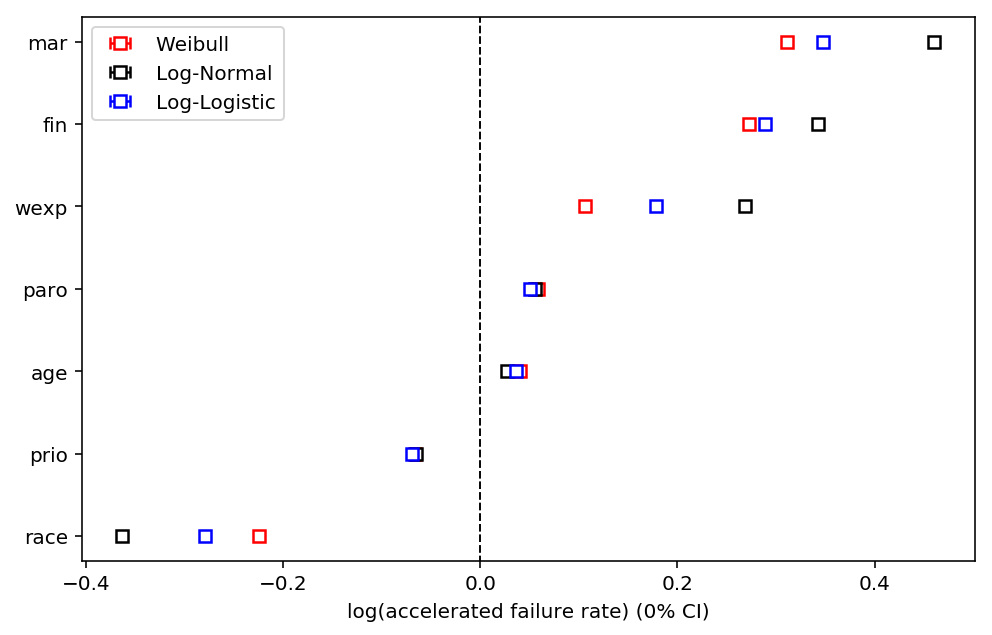

In [3]:
fig = plt.figure(figsize=(8, 5))
ax = fig.subplots()
columns = ['fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio']
wft.plot(columns=columns, parameter='lambda_', c='red', label='Weibull', ax=ax)
lnt.plot(columns=columns, parameter='mu_', c='k', label='Log-Normal', ax=ax)
llt.plot(columns=columns, parameter='alpha_', c='b', label='Log-Logistic', ax=ax)

plt.legend()

In [4]:
wft.print_summary(4)
lnt.print_summary(4)
llt.print_summary(4)

<lifelines.WeibullAFTFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -679.9166
  time fit was run = 2019-02-24 19:24:52 UTC

---
                      coef  exp(coef)  se(coef)       z      p  -log2(p)  lower 0  upper 0
lambda_ fin         0.2722     1.3128    0.1380  1.9727 0.0485    4.3651   0.2722   0.2722
        age         0.0407     1.0416    0.0160  2.5441 0.0110    6.5121   0.0407   0.0407
        race       -0.2248     0.7987    0.2202 -1.0211 0.3072    1.7028  -0.2248  -0.2248
        wexp        0.1065     1.1124    0.1515  0.7031 0.4820    1.0529   0.1065   0.1065
        mar         0.3113     1.3652    0.2733  1.1390 0.2547    1.9730   0.3113   0.3113
        paro        0.0588     1.0606    0.1396  0.4213 0.6735    0.5702   0.0588   0.0588
        prio       -0.0658     0.9363    0.0209 -3.1430 0.0017    9.2242  -0.0658  -0.0658
        _i

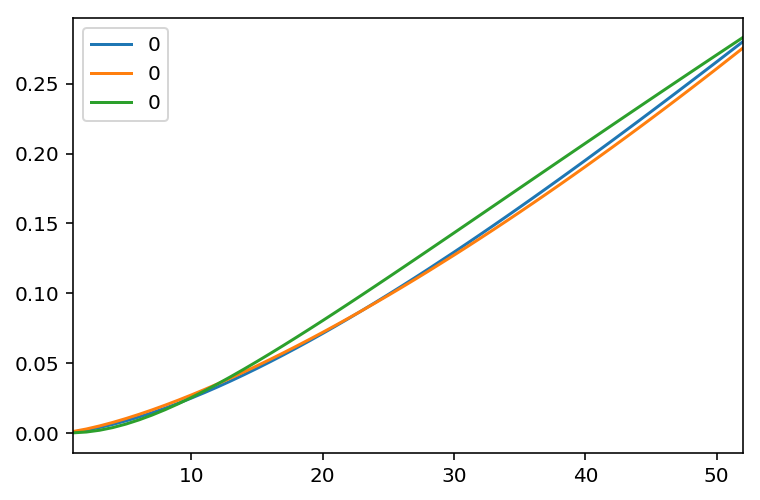

In [8]:
ax = llt.predict_cumulative_hazard(llt._norm_mean.to_frame().T).plot()
wft.predict_cumulative_hazard(llt._norm_mean.to_frame().T).plot(ax=ax)
lnt.predict_cumulative_hazard(llt._norm_mean.to_frame().T).plot(ax=ax)

In [9]:
from lifelines.datasets import load_regression_dataset


df = load_regression_dataset()

alpha = 1.
wft = WeibullAFTFitter(alpha=alpha).fit(df, 'T', 'E')
lnt = LogNormalAFTFitter(alpha=alpha).fit(df, 'T', 'E')
llt = LogLogisticAFTFitter(alpha=alpha).fit(df, 'T', 'E')

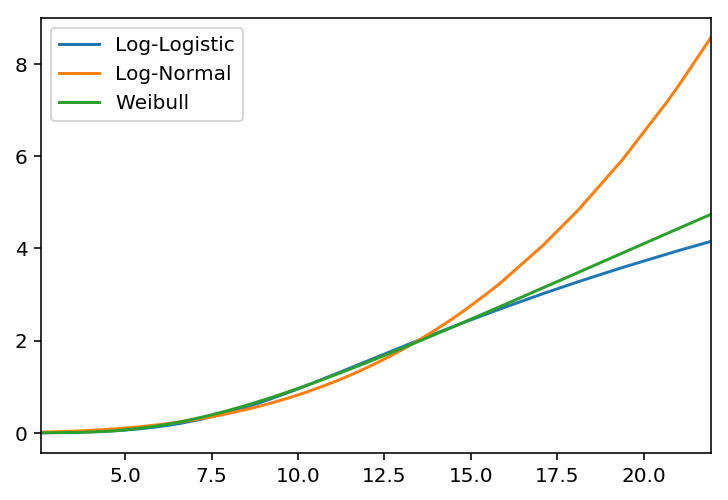

In [13]:
ax = llt.predict_cumulative_hazard(llt._norm_mean.to_frame(name='Log-Logistic').T).plot()
wft.predict_cumulative_hazard(llt._norm_mean.to_frame(name='Log-Normal').T).plot(ax=ax)
lnt.predict_cumulative_hazard(llt._norm_mean.to_frame(name='Weibull').T).plot(ax=ax)
plt.legend()

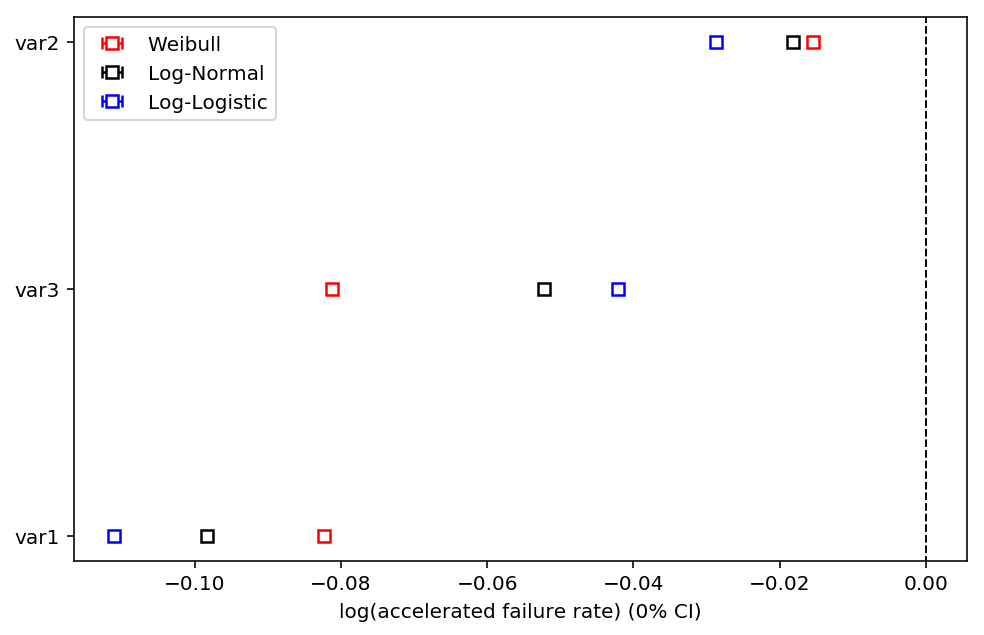

In [15]:
fig = plt.figure(figsize=(8, 5))
ax = fig.subplots()
columns = ['var1', 'var2', 'var3']
wft.plot(columns=columns, parameter='lambda_', c='red', label='Weibull', ax=ax)
lnt.plot(columns=columns, parameter='mu_', c='k', label='Log-Normal', ax=ax)
llt.plot(columns=columns, parameter='alpha_', c='b', label='Log-Logistic', ax=ax)

plt.legend()

In [16]:
wft.print_summary(4)
lnt.print_summary(4)
llt.print_summary(4)

<lifelines.WeibullAFTFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event col = 'E'
number of subjects = 200
  number of events = 189
    log-likelihood = -504.4834
  time fit was run = 2019-02-24 19:25:43 UTC

---
                      coef  exp(coef)  se(coef)       z      p  -log2(p)  lower 0  upper 0
lambda_ var1       -0.0823     0.9210    0.0239 -3.4454 0.0006   10.7764  -0.0823  -0.0823
        var2       -0.0155     0.9846    0.0275 -0.5628 0.5736    0.8020  -0.0155  -0.0155
        var3       -0.0812     0.9220    0.0244 -3.3267 0.0009   10.1522  -0.0812  -0.0812
        _intercept  2.5315    12.5722    0.0495 51.1170 <5e-05       inf   2.5315   2.5315
rho_    _intercept  1.0931     2.9836    0.0543 20.1196 <5e-05  296.6589   1.0931   1.0931
---
Concordance = 0.5798
Log-likelihood ratio test = 19.7251 on 3 df, -log2(p)=12.3351
<lifelines.LogNormalAFTFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event 